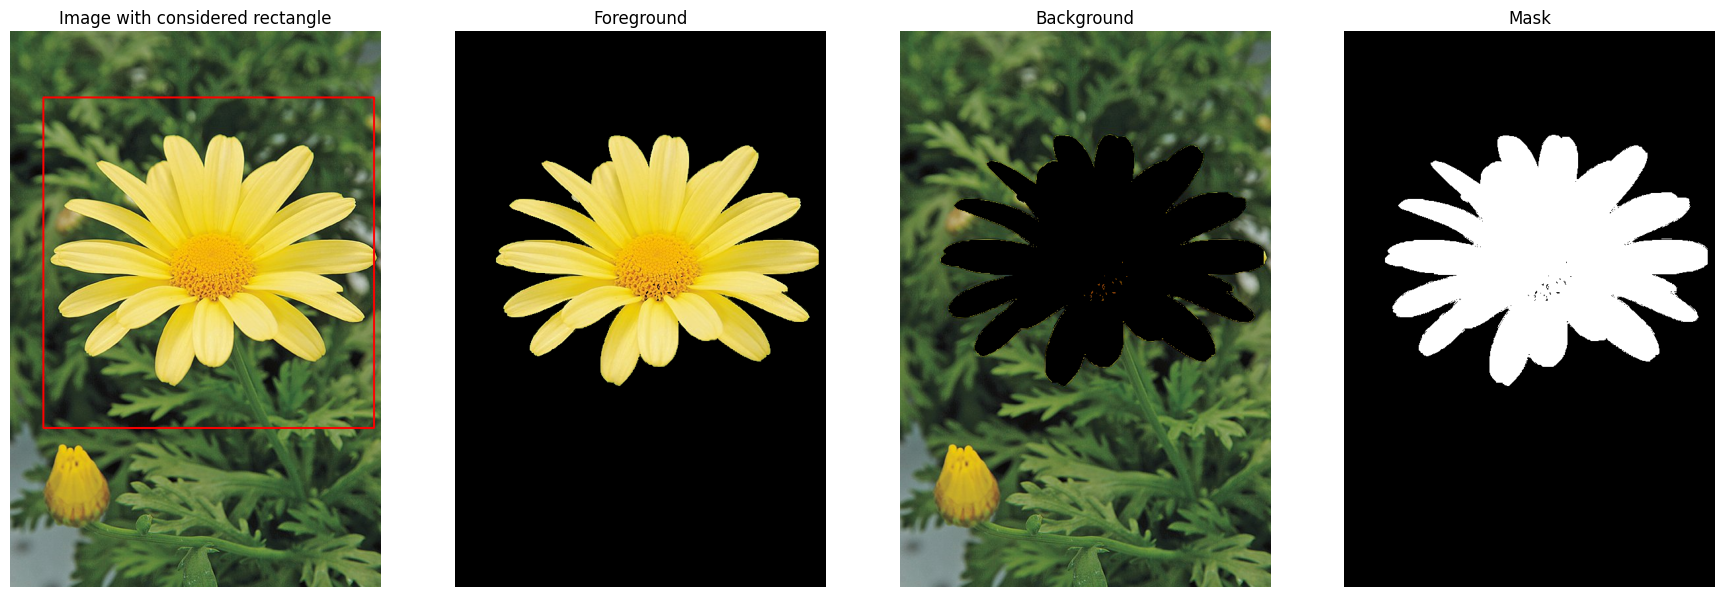

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im = cv2.imread('/Users/kavindujayathissa/Desktop/Academics/Semester 05/EN3160 Image Processing/Assignment A01/a1images/daisy.jpg')
orig = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
mask = np.zeros(im.shape[:2], np.uint8)
bgdModel, fgdModel = np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)
rect = (50, 100, 500, 500)
cv2.grabCut(im, mask, rect, bgdModel, fgdModel, 3, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
FG, BG = im * mask2[:, :, np.newaxis], im - (im * mask2[:, :, np.newaxis])
cv2.rectangle(orig, (50, 100), (550, 600), (255, 0, 0), 2)
fig, ax = plt.subplots(1, 4, figsize=(22, 10))
ax[0].imshow(orig), ax[0].set_title('Image with considered rectangle'), ax[0].axis('off')
ax[1].imshow(cv2.cvtColor(FG, cv2.COLOR_BGR2RGB)), ax[1].set_title('Foreground'), ax[1].axis('off')
ax[2].imshow(cv2.cvtColor(BG, cv2.COLOR_BGR2RGB)), ax[2].set_title('Background'), ax[2].axis('off')
ax[3].imshow(mask2 * 255, cmap='gray'), ax[3].set_title('Mask'), ax[3].axis('off')
plt.show()
